## Project: Exploring Prediction- Survival on the Titanic
## Name : Rajib Samanta


In [1]:
# Load the Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### Source Data
Here are the list of files
There are three files in the data: 
1. train.csv
2. test.csv and 
3. gender_submission.csv.

In this these dataset

if survived is "1", the passenger survived.

if survived is "0", the passenger died.

#### Introduction
For this project I have choosen the Titanic dataset from  Kagglers. I will focus on creating some illustrative data visualizations. For the predictive modeling, I’ll be using a randomForest algorithm to predict survival on the Titanic.
My script is divided into three parts:
1. Feature Engineering
2. Missing Value Imputation
3. Prediction!

In [2]:
### Load Data
#### Step1: Training data set
# 1. Load the tarining dataset(train.csv)
directory = '/Users/rajibsamanta/Documents/Rajib/College/Semester 10/Week 6' 
# Set the working directory
os.chdir(directory)
print(os.getcwd())
files = os.listdir()
# Display the list of files
#print("Files in the current directory:")
#for file in files:
 #   print(file)
# Load the CSV file into a DataFrame
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_gender_submission = pd.read_csv("gender_submission.csv")
#df_train.head(10)
# Display the DataFrame 10 rows

/Users/rajibsamanta/Documents/Rajib/College/Semester 10/Week 6


In [3]:
# Shape of the dataset
print(df_train.shape)

# Data types and missing values
print(df_train.info())
# Describe 
print(df_train.describe())
# Preview of the dataset
df_train.head()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Visualizations

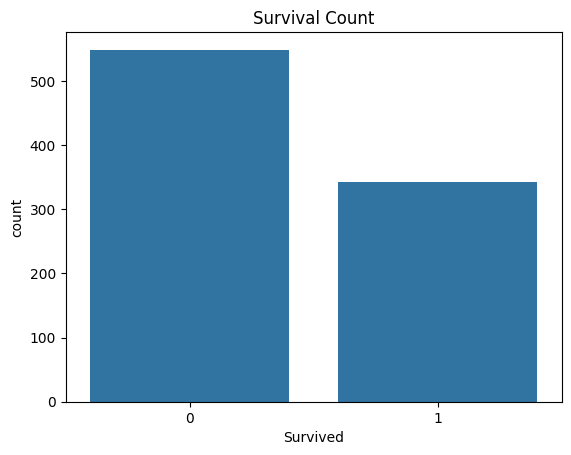

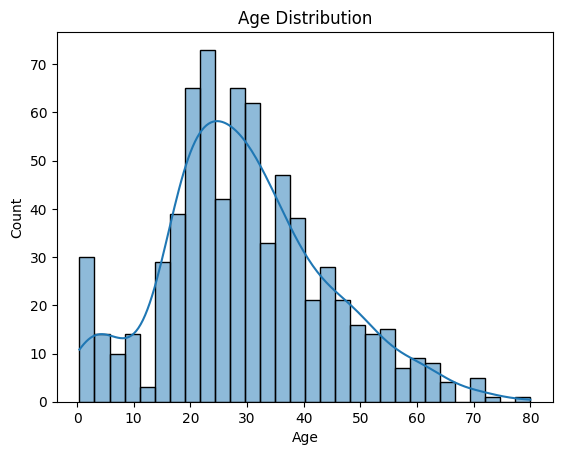

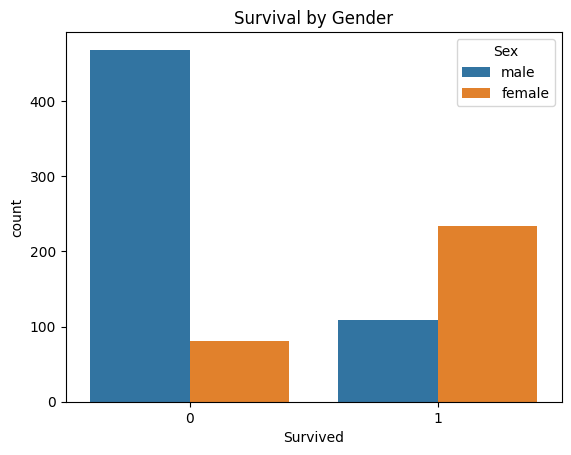

In [4]:
# Survival distribution
sns.countplot(x='Survived', data=df_train)
plt.title('Survival Count')
plt.show()

# Age distribution
sns.histplot(df_train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title('Survival by Gender')
plt.show()

This plot visualizes how survival rates differ between male and female passengers.

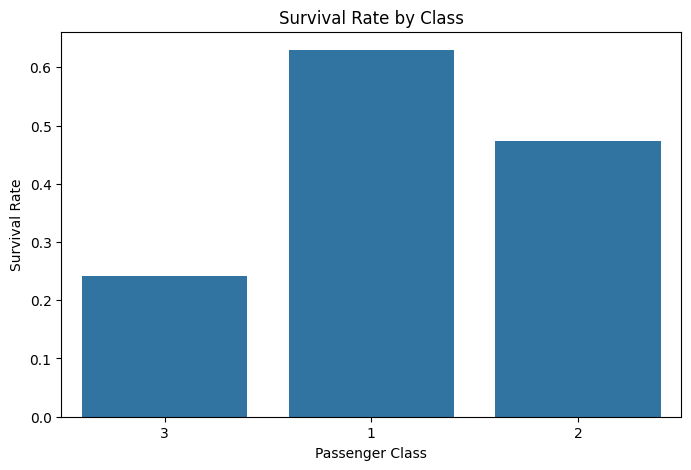

In [5]:
# 4. Survival Rate by Class
plt.figure(figsize=(8, 5))
sns.barplot(x=df_train['Pclass'].astype(str), y='Survived', data=df_train, ci=None)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

A bar plot shows the average survival rate for each passenger class, giving a clear comparison.

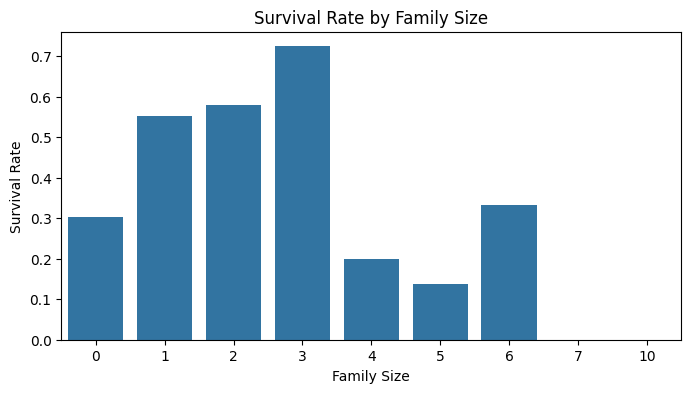

In [6]:
# 5. Family Size (SibSp + Parch) and Survival
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
plt.figure(figsize=(8, 4))
sns.barplot(x='FamilySize', y='Survived', data=df_train, ci=None)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

This bar plot shows how family size (total number of siblings/spouses and parents/children) correlates with survival rates.

### Data Cleaning
Handle missing values and convert categorical variables to numerical.

In [7]:
# Fill missing values for 'Age' with median
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# Drop 'Cabin' column due to high number of missing values
df_train.drop('Cabin', axis=1, inplace=True)

# Convert 'Embarked' to numerical using one-hot encoding
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=True)

# Drop 'Name' and 'Ticket' as they are not useful for modeling
df_train.drop(['Name', 'Ticket'], axis=1, inplace=True)

### What is the % of women survived ?


In [8]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


### What is the % of men survived ?

In [9]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


### Modeling
We will use Random forest model for testing this model and prediction.

In [10]:
y = df_train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
# Predictions on the training set for accuracy
#y_pred_train = model.predict(X)

# Calculate accuracy
#accuracy = accuracy_score(y, predictions)
#print(f'Model Training Accuracy: {accuracy:.2f}')

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [11]:
df_submission = pd.read_csv("submission.csv")
df_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [12]:
df_gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
